In [1]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from yellowbrick.classifier import ConfusionMatrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [2]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("/home/tuts/data/mldsfromatoz/census.csv")

In [4]:
df.shape

(32561, 15)

In [5]:
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
np.unique(df.income, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

### Unbalanced data

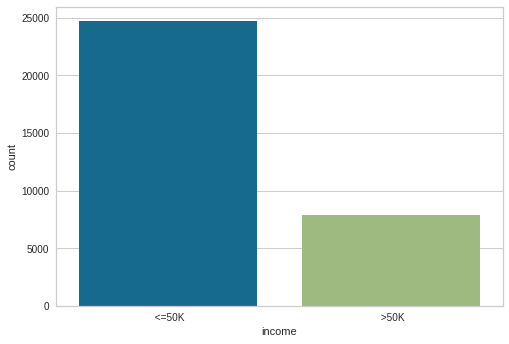

In [7]:
sns.countplot(x=df.income);

### Encoding

In [8]:
X_cols = list(df.columns)
X_cols.remove("income")

X = df[X_cols]
y = df.income

In [9]:
# jump this cell to use pd.get_dummies afterwards

def encode_cols(df):
    encoders = list()
    for col in df.columns:
        l = LabelEncoder()
        l.fit(df[col])
        encoders.append(l)
        df[col] = l.transform(df[col])
    return encoders


encoders = encode_cols(X)

/tmp/ipykernel_5063/947172191.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = l.transform(df[col])


In [10]:
Xv = X.values
yv = y.values

### Undersampling

In [11]:
tl = TomekLinks(sampling_strategy="majority")

X_un, y_un = tl.fit_resample(Xv, yv)

In [12]:
X_un.shape

(30476, 14)

In [13]:
np.unique(df.income, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [14]:
np.unique(y_un, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22635,  7841]))

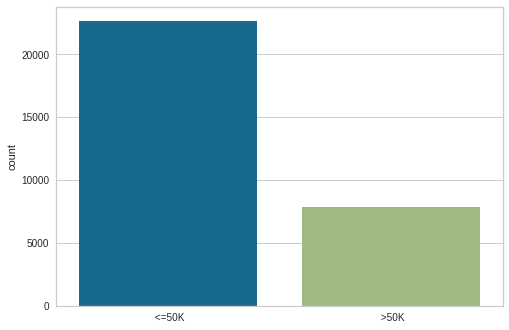

In [15]:
sns.countplot(x=y_un);

### Using OHE

In [27]:
Xd = pd.get_dummies(X)

tl = TomekLinks(sampling_strategy="majority")

X_un, y_un = tl.fit_resample(Xd, y)

In [34]:
X_tr, X_t, y_tr, y_t = train_test_split(X_un, y_un, random_state=42, test_size=.2)

In [35]:
X_tr.shape, X_t.shape

((24380, 14), (6096, 14))

In [36]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=500)

In [37]:
rf.fit(X_tr, y_tr)

preds = rf.predict(X_t)

print(classification_report(y_t, preds))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4542
        >50K       0.77      0.68      0.72      1554

    accuracy                           0.86      6096
   macro avg       0.83      0.80      0.81      6096
weighted avg       0.86      0.86      0.86      6096



## Smote

In [38]:
smote = SMOTE(sampling_strategy='minority')

In [39]:
X_sm_un, y_sm_un = smote.fit_resample(Xv, yv)

In [40]:
yv.shape

(32561,)

In [41]:
y_sm_un.shape

(49440,)

In [42]:
np.unique(yv, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [43]:
np.unique(y_sm_un, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720]))

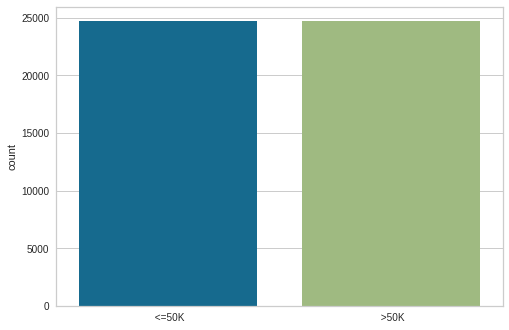

In [44]:
sns.countplot(x=y_sm_un);

### Using OHE

In [45]:
sm = SMOTE(sampling_strategy="minority")

X_sm_un, y_sm_un = smote.fit_resample(Xd, y)

X_tr, X_t, y_tr, y_t = train_test_split(X_sm_un, y_sm_un, random_state=42, test_size=.2)

rf = RandomForestClassifier(criterion='entropy', n_estimators=500)

rf.fit(X_tr, y_tr)

preds = rf.predict(X_t)

print(classification_report(y_t, preds))

              precision    recall  f1-score   support

       <=50K       0.90      0.89      0.89      4938
        >50K       0.89      0.90      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

